In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt

# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
sns.set(color_codes=True)

In [3]:
customer_df = pd.read_csv(r'C:\Users\DELL\OneDrive\Documents\DATASETS\Online Retail.csv', encoding="ISO-8859-1")

In [4]:
customer_df.info()  
customer_df.head()  
customer_df.describe()  
customer_df.nunique()  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   ï»¿InvoiceNo  541909 non-null  object 
 1   StockCode     541909 non-null  object 
 2   Description   540455 non-null  object 
 3   Quantity      541909 non-null  int64  
 4   InvoiceDate   541909 non-null  object 
 5   UnitPrice     541909 non-null  float64
 6   CustomerID    406829 non-null  float64
 7   Country       541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


ï»¿InvoiceNo    25900
StockCode        4070
Description      4223
Quantity          722
InvoiceDate     23260
UnitPrice        1630
CustomerID       4372
Country            38
dtype: int64

In [6]:
customer_df.isnull().sum()
customer_df.dropna(inplace=True)
customer_df.duplicated().sum()
customer_df.drop_duplicates(inplace=True)
customer_df["InvoiceDate"] = pd.to_datetime(customer_df["InvoiceDate"],dayfirst=True, errors="coerce")


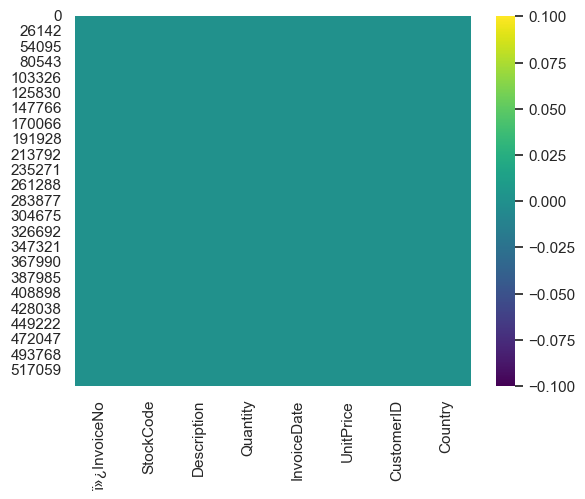

In [7]:
sns.heatmap(customer_df.isnull(), cmap="viridis")
plt.show()


Finding Top Selling Products
-The bar chart below shows that the most selling product is the World War 2 Gliders with a quantity of 53119 while the least selling product in the most top 10 products is the Pack of 60 Pink Paisley cake cases with a quantity of  25305
- The most returned or refunded product is the ROTATING SILVER ANGELS T-LIGHT HLDR with a quantity of -1475

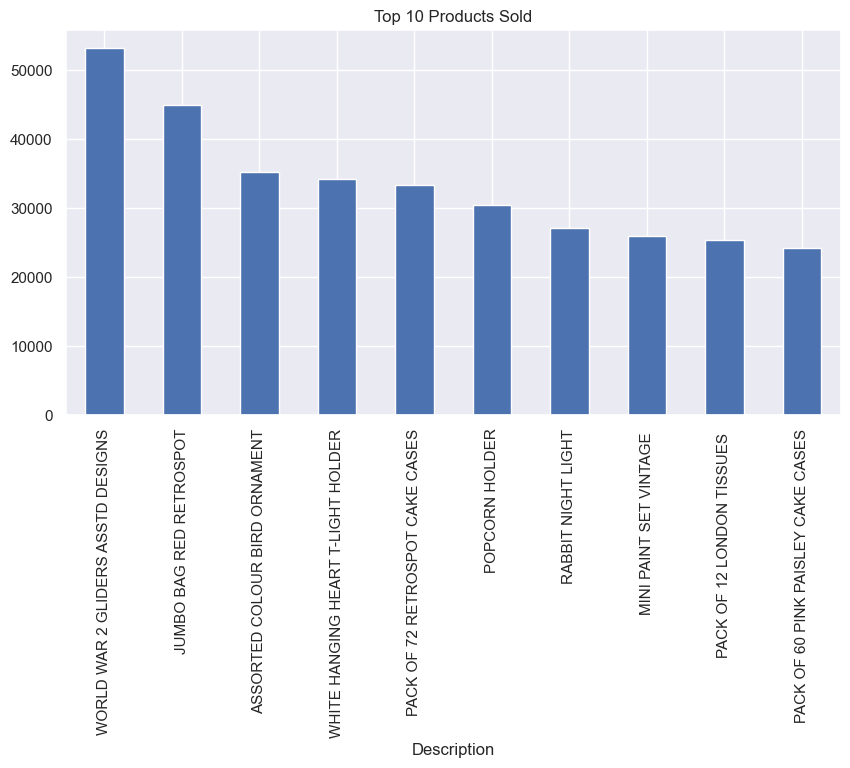

In [10]:
top_products = customer_df.groupby("Description")["Quantity"].sum().sort_values(ascending=False).head(10)
top_products.plot(kind="bar", figsize=(10,5), title="Top 10 Products Sold")
plt.show()


In [15]:
top_products = customer_df.groupby("Description")["Quantity"].sum().sort_values(ascending=False).head(10)
print (top_products)

Description
WORLD WAR 2 GLIDERS ASSTD DESIGNS     53119
JUMBO BAG RED RETROSPOT               44963
ASSORTED COLOUR BIRD ORNAMENT         35215
WHITE HANGING HEART T-LIGHT HOLDER    34128
PACK OF 72 RETROSPOT CAKE CASES       33386
POPCORN HOLDER                        30492
RABBIT NIGHT LIGHT                    27045
MINI PAINT SET VINTAGE                25880
PACK OF 12 LONDON TISSUES             25305
PACK OF 60 PINK PAISLEY CAKE CASES    24129
Name: Quantity, dtype: int64


In [17]:
top_products = customer_df.groupby("Description")["Quantity"].sum().sort_values(ascending=False)
print (top_products)

Description
WORLD WAR 2 GLIDERS ASSTD DESIGNS      53119
JUMBO BAG RED RETROSPOT                44963
ASSORTED COLOUR BIRD ORNAMENT          35215
WHITE HANGING HEART T-LIGHT HOLDER     34128
PACK OF 72 RETROSPOT CAKE CASES        33386
                                       ...  
PINK POODLE HANGING DECORATION           -12
CRUK Commission                          -16
ASSORTED TUTTI FRUTTI ROUND BOX          -24
Discount                               -1194
ROTATING SILVER ANGELS T-LIGHT HLDR    -1475
Name: Quantity, Length: 3896, dtype: int64


Finding the top spending customers
- The top spending customer with the ID 14646 spent a total of 279489.02 dollars while the least spending customer with ID 15311 in the top 10 customers with spent a total of  59284.19 dollars
-The customer with ID 17448 has had the most order refund or returns with a total of 4287.63 dollars

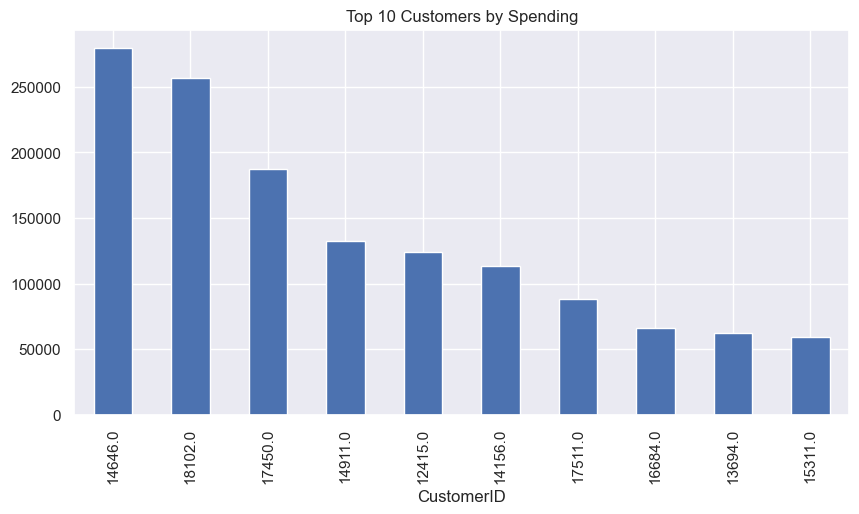

In [16]:
customer_df["TotalPrice"] = customer_df["Quantity"] * customer_df["UnitPrice"]
top_customers = customer_df.groupby("CustomerID")["TotalPrice"].sum().sort_values(ascending=False).head(10)
top_customers.plot(kind="bar", figsize=(10,5), title="Top 10 Customers by Spending")
plt.show()


In [18]:
customer_df["TotalPrice"] = customer_df["Quantity"] * customer_df["UnitPrice"]
top_customers = customer_df.groupby("CustomerID")["TotalPrice"].sum().sort_values(ascending=False).head(10)
print(top_customers)

CustomerID
14646.0    279489.02
18102.0    256438.49
17450.0    187322.17
14911.0    132458.73
12415.0    123725.45
14156.0    113214.59
17511.0     88125.38
16684.0     65892.08
13694.0     62690.54
15311.0     59284.19
Name: TotalPrice, dtype: float64


In [19]:
customer_df["TotalPrice"] = customer_df["Quantity"] * customer_df["UnitPrice"]
top_customers = customer_df.groupby("CustomerID")["TotalPrice"].sum().sort_values(ascending=False)
print(top_customers)

CustomerID
14646.0    279489.02
18102.0    256438.49
17450.0    187322.17
14911.0    132458.73
12415.0    123725.45
             ...    
12503.0     -1126.00
17603.0     -1165.30
14213.0     -1192.20
15369.0     -1592.49
17448.0     -4287.63
Name: TotalPrice, Length: 4372, dtype: float64


Identifying sale trends over time
- The sales increased from the beginning of they year 2011 till the November with recorded the highest number of sales at   1126815.070 dollars but took a sudden drop by December which recorded the lowest number of sales at  341539.430 dollars.

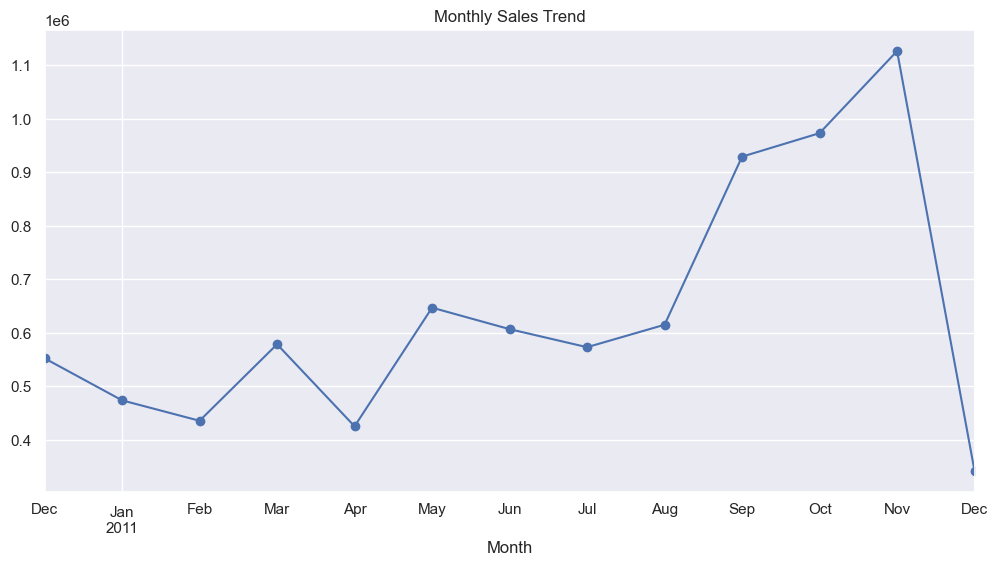

In [20]:
customer_df["Month"] = customer_df["InvoiceDate"].dt.to_period("M")
monthly_sales = customer_df.groupby("Month")["TotalPrice"].sum()
monthly_sales.plot(kind="line", figsize=(12,6), marker="o", title="Monthly Sales Trend")
plt.show()


In [22]:
customer_df["Month"] = customer_df["InvoiceDate"].dt.to_period("M")
monthly_sales = customer_df.groupby("Month")["TotalPrice"].sum().sort_values(ascending=False)
print(monthly_sales)

Month
2011-11    1126815.070
2011-10     973306.380
2011-09     929356.232
2011-05     647011.670
2011-08     615078.090
2011-06     606862.520
2011-03     578576.210
2011-07     573112.321
2010-12     552372.860
2011-01     473731.900
2011-02     435534.070
2011-04     425222.671
2011-12     341539.430
Freq: M, Name: TotalPrice, dtype: float64


Identify anomalies (extreme values in order amounts)

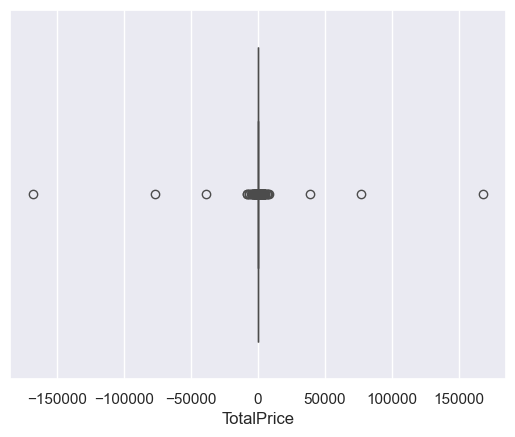

In [23]:
sns.boxplot(x=customer_df["TotalPrice"])
plt.show()


Check correlation between sales and quantity sold
-TotalPrice and Quantity have a high positive correlation of 0.91613. This means that there is a strong positive relationship between the total price and the quantity sold.A correlation of 0.91613 indicates that about 91.6% of the variation in total sales (TotalPrice) can be explained by the variation in the quantity sold, suggesting they move in the same direction most of the time.

In [25]:
customer_df[["TotalPrice", "Quantity"]].corr()


,TotalPrice,Quantity
TotalPrice,1.00000,0.91613
Quantity,0.91613,1.00000


Compare revenue trends by country
- United Kingdom has provided the highest revenue with 6747156.154 dollars and Saudi Arabia withe the lowest revenue of  131.170 dollars

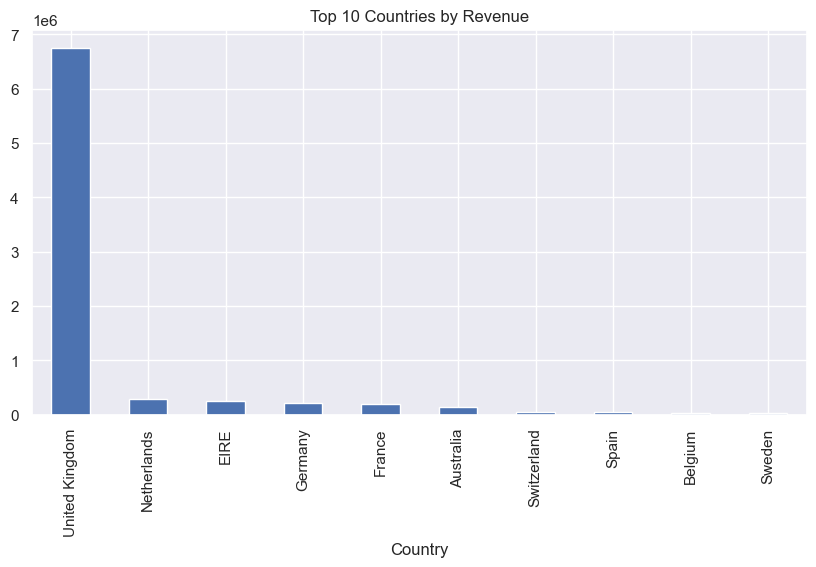

In [26]:
top_countries = customer_df.groupby("Country")["TotalPrice"].sum().sort_values(ascending=False).head(10)
top_countries.plot(kind="bar", figsize=(10,5), title="Top 10 Countries by Revenue")
plt.show()


In [28]:
top_countries = customer_df.groupby("Country")["TotalPrice"].sum().sort_values(ascending=False)
print(top_countries)

Country
United Kingdom          6747156.154
Netherlands              284661.540
EIRE                     250001.780
Germany                  221509.470
France                   196626.050
Australia                137009.770
Switzerland               55739.400
Spain                     54756.030
Belgium                   40910.960
Sweden                    36585.410
Japan                     35340.620
Norway                    35163.460
Portugal                  28995.760
Finland                   22326.740
Channel Islands           20076.390
Denmark                   18768.140
Italy                     16890.510
Cyprus                    12858.760
Austria                   10154.320
Singapore                  9120.390
Poland                     7213.140
Israel                     6988.400
Greece                     4710.520
Iceland                    4310.000
Canada                     3666.380
Unspecified                2660.770
Malta                      2505.470
United Arab Emirates

In [29]:
# Average order value by country
customer_df.groupby("Country")["TotalPrice"].mean().sort_values(ascending=False)


Country
Netherlands             120.059696
Australia               108.910787
Japan                    98.716816
Sweden                   79.360976
Denmark                  48.247147
Lithuania                47.458857
Singapore                39.827031
Lebanon                  37.641778
Brazil                   35.737500
EIRE                     33.445054
Norway                   32.378877
Greece                   32.263836
Bahrain                  32.258824
Finland                  32.124806
Switzerland              29.696004
Israel                   28.293117
United Arab Emirates     27.974706
Channel Islands          26.520991
Austria                  25.322494
Canada                   24.280662
Iceland                  23.681319
Czech Republic           23.590667
Germany                  23.365978
France                   23.200714
Spain                    21.659822
European Community       21.176230
Poland                   21.152903
Cyprus                   21.045434
Italy       

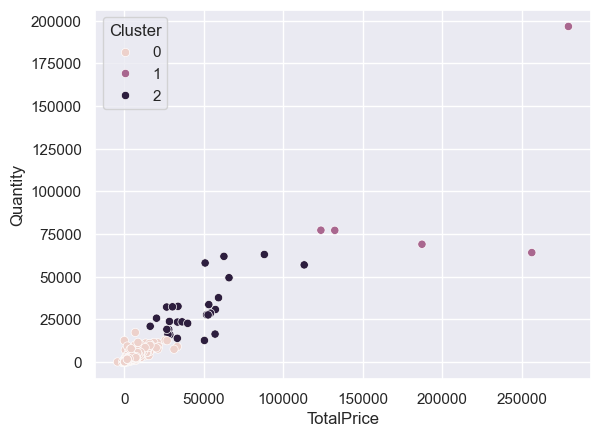

In [30]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

customer_data = customer_df.groupby("CustomerID").agg({"TotalPrice":"sum", "Quantity":"sum"}).dropna()
scaler = StandardScaler()
customer_scaled = scaler.fit_transform(customer_data)

kmeans = KMeans(n_clusters=3, random_state=42)
customer_data["Cluster"] = kmeans.fit_predict(customer_scaled)

sns.scatterplot(x=customer_data["TotalPrice"], y=customer_data["Quantity"], hue=customer_data["Cluster"])
plt.show()


In [31]:
customer_df[customer_df["TotalPrice"] > customer_df["TotalPrice"].quantile(0.99)]


,ï»¿InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Month
46,536371,22086,PAPER CHAIN KIT 50'S CHRISTMAS,80,2010-12-01 09:00:00,2.55,13748.0,United Kingdom,204.00,2010-12
65,536374,21258,VICTORIAN SEWING BOX LARGE,32,2010-12-01 09:09:00,10.95,15100.0,United Kingdom,350.40,2010-12
178,536387,79321,CHILLI LIGHTS,192,2010-12-01 09:58:00,3.82,16029.0,United Kingdom,733.44,2010-12
179,536387,22780,LIGHT GARLAND BUTTERFILES PINK,192,2010-12-01 09:58:00,3.37,16029.0,United Kingdom,647.04,2010-12
180,536387,22779,WOODEN OWLS LIGHT GARLAND,192,2010-12-01 09:58:00,3.37,16029.0,United Kingdom,647.04,2010-12
...,...,...,...,...,...,...,...,...,...,...
540442,581487,21137,BLACK RECORD COVER FRAME,120,2011-12-09 09:44:00,3.39,15694.0,United Kingdom,406.80,2011-12
541222,581495,15056N,EDWARDIAN PARASOL NATURAL,36,2011-12-09 10:20:00,5.95,14051.0,United Kingdom,214.20,2011-12
541223,581495,15056BL,EDWARDIAN PARASOL BLACK,36,2011-12-09 10:20:00,5.95,14051.0,United Kingdom,214.20,2011-12
541702,581566,23404,HOME SWEET HOME BLACKBOARD,144,2011-12-09 11:50:00,3.26,18102.0,United Kingdom,469.44,2011-12
